<a href="https://colab.research.google.com/github/Godswillben/Machine-learning-practice/blob/master/deep_learning_bas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# Download train data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download = True,
    transform=ToTensor()
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train= False,
    download = True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.3MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 198kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.67MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 14.8MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
batch_size = 64

# Create dataloaders
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [4]:
device = ("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

# Define model
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [6]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:.7f} [{current:>5d}/{size:>5d}]")

In [7]:
def test(dataloader, model, loss_fn):
  size=len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1)==y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [8]:
epochs = 5
for t in range(epochs):
  print(f"Epoch {t+1}\n---------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
---------------------
loss: 2.3007674 [   64/60000]
loss: 2.2925169 [ 6464/60000]
loss: 2.2737808 [12864/60000]
loss: 2.2701247 [19264/60000]
loss: 2.2587059 [25664/60000]
loss: 2.2223492 [32064/60000]
loss: 2.2342873 [38464/60000]
loss: 2.2003717 [44864/60000]
loss: 2.2008789 [51264/60000]
loss: 2.1821406 [57664/60000]
Test Error: 
 Accuracy: 39.5%, Avg loss: 2.167314 

Epoch 2
---------------------
loss: 2.1715550 [   64/60000]
loss: 2.1655593 [ 6464/60000]
loss: 2.1141160 [12864/60000]
loss: 2.1376994 [19264/60000]
loss: 2.0940244 [25664/60000]
loss: 2.0198925 [32064/60000]
loss: 2.0574126 [38464/60000]
loss: 1.9783298 [44864/60000]
loss: 1.9898460 [51264/60000]
loss: 1.9335694 [57664/60000]
Test Error: 
 Accuracy: 55.2%, Avg loss: 1.923964 

Epoch 3
---------------------
loss: 1.9442105 [   64/60000]
loss: 1.9219527 [ 6464/60000]
loss: 1.8159286 [12864/60000]
loss: 1.8669074 [19264/60000]
loss: 1.7627399 [25664/60000]
loss: 1.6907166 [32064/60000]
loss: 1.7246982 [38464/600

In [9]:
torch.save(model.state_dict(), "model.pth")
print(f"Saved pytroch model state to model.ptch")

Saved pytroch model state to model.ptch


In [11]:
import matplotlib.pyplot as plt


In [13]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X * bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.0000],
         [0.0042],
         [0.0084],
         [0.0126],
         [0.0168],
         [0.0210],
         [0.0252],
         [0.0294],
         [0.0336],
         [0.0378]]))

In [21]:
# Create train test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [30]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
    Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

  plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  plt.legend(prop={'size': 14});

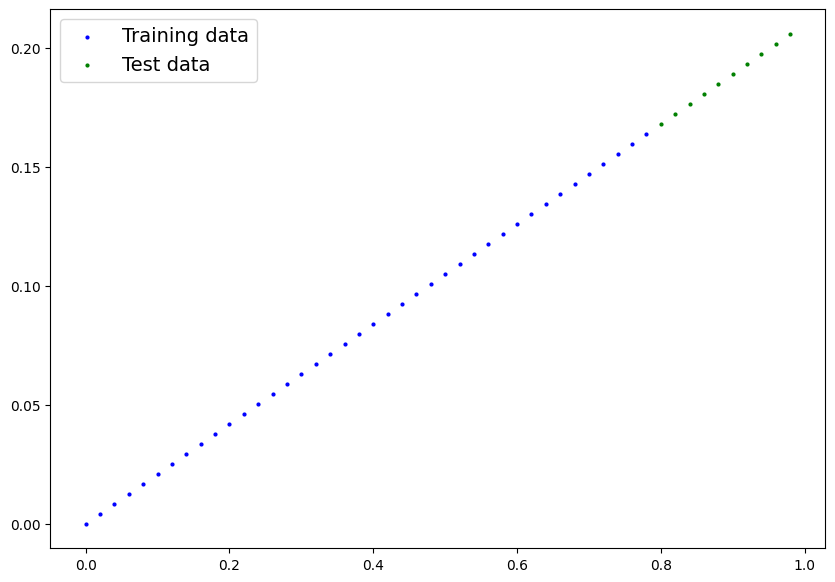

In [31]:
plot_predictions()

In [39]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  # Forward defines the forward computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [41]:
torch.manual_seed(42)


model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [42]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [43]:
with torch.inference_mode():
  y_preds = model_0(X_test)

In [44]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of testing predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of testing predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


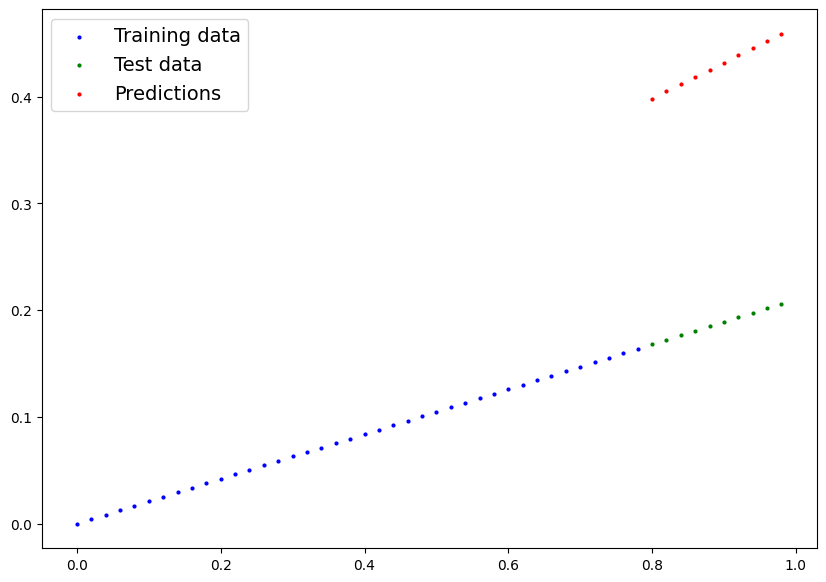

In [45]:
plot_predictions(predictions=y_preds)

In [46]:
y_test - y_preds

tensor([[-0.2302],
        [-0.2327],
        [-0.2352],
        [-0.2378],
        [-0.2403],
        [-0.2428],
        [-0.2454],
        [-0.2479],
        [-0.2504],
        [-0.2530]])

In [47]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [52]:
torch.manual_seed(42)

epochs = 100

# track values:
train_loss_values = []
test_loss_values= []
epoch_count=[]

for epoch in range(epochs):
  # Model in training mode
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)

    # calculate loss on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch {epoch} | MAE TRAIN Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch 0 | MAE TRAIN Loss: 0.10909267514944077 | MAE Test Loss: 0.1472669094800949
Epoch 10 | MAE TRAIN Loss: 0.01360651571303606 | MAE Test Loss: 0.033568356186151505
Epoch 20 | MAE TRAIN Loss: 0.009221606887876987 | MAE Test Loss: 0.020558815449476242
Epoch 30 | MAE TRAIN Loss: 0.005788784008473158 | MAE Test Loss: 0.012973301112651825
Epoch 40 | MAE TRAIN Loss: 0.002358086872845888 | MAE Test Loss: 0.004022905137389898
Epoch 50 | MAE TRAIN Loss: 0.009151091799139977 | MAE Test Loss: 0.0006053060060366988
Epoch 60 | MAE TRAIN Loss: 0.009151091799139977 | MAE Test Loss: 0.0006053060060366988
Epoch 70 | MAE TRAIN Loss: 0.009151091799139977 | MAE Test Loss: 0.0006053060060366988
Epoch 80 | MAE TRAIN Loss: 0.009151091799139977 | MAE Test Loss: 0.0006053060060366988
Epoch 90 | MAE TRAIN Loss: 0.009151091799139977 | MAE Test Loss: 0.0006053060060366988


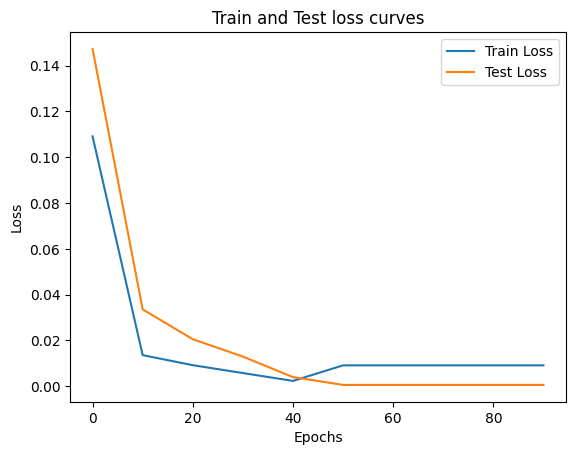

In [53]:
plt.plot(epoch_count, train_loss_values, label= "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Train and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [54]:
print("The model learned the following values for weight and bais:")
print(model_0.state_dict())
print("\nAnd the original values for weight and bais are:")
print(f"Weight: {weight} | Bias: {bias}")

The model learned the following values for weight and bais:
OrderedDict([('weights', tensor([0.2199])), ('bias', tensor([0.0053]))])

And the original values for weight and bais are:
Weight: 0.7 | Bias: 0.3


In [55]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.1812],
        [0.1856],
        [0.1900],
        [0.1944],
        [0.1988],
        [0.2032],
        [0.2076],
        [0.2120],
        [0.2164],
        [0.2208]])

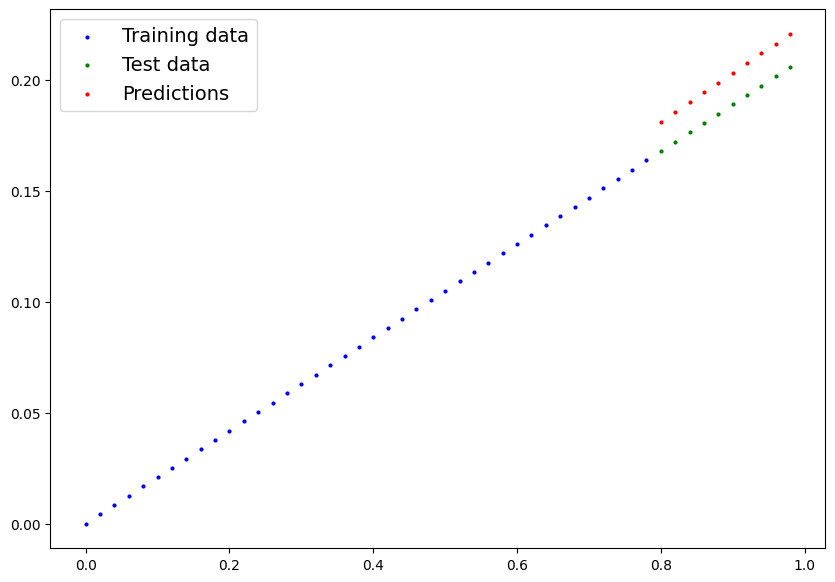

In [56]:
plot_predictions(predictions=y_preds)

In [59]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

Model_name = "model_intro.pth"
Model_Save_Path = MODEL_PATH / Model_name

print(f"Saving model to: {Model_Save_Path}")
torch.save(obj=model_0.state_dict(), f=Model_Save_Path)

Saving model to: models/model_intro.pth


In [60]:
!ls -l models/model_intro.pth

-rw-r--r-- 1 root root 1520 Nov 22 11:10 models/model_intro.pth


In [61]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=Model_Save_Path))

<ipython-input-61-23f5d66768c5>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=Model_Save_Path))


<All keys matched successfully>

In [62]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [63]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])